Get an inspiration from shijingliang and github resources.

# PS1

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

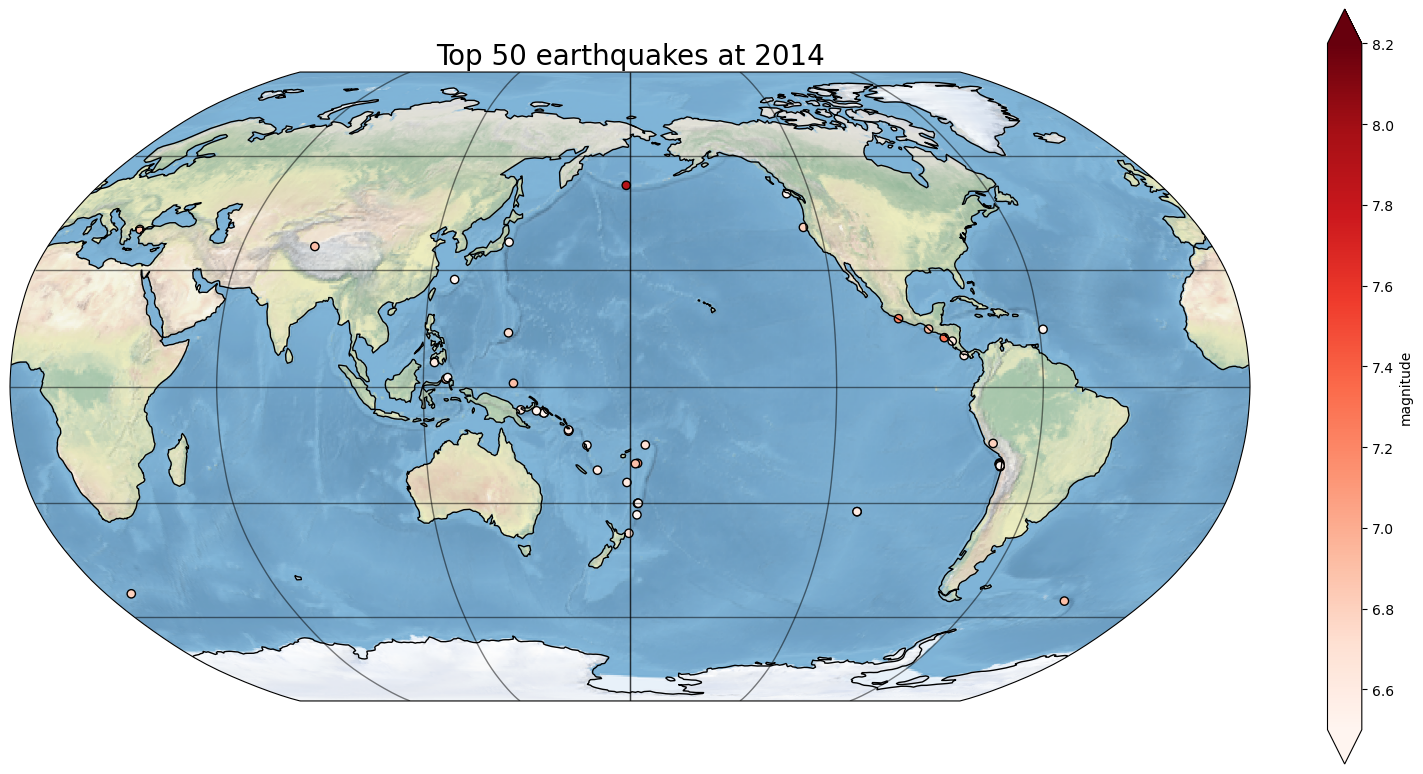

In [2]:
# Load the csv file
ds = pd.read_csv("usgs_earthquakes.csv")
# Sort the top 50 earthquakes
top_50 = ds.sort_values("mag", ascending=False)[:50]

# Create and define the size of a figure object 
plt.figure(figsize=(20,20), dpi=100)

# Create an axes with Robinson projection style
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)
ax.set_global()
ax.stock_img()
ax.coastlines()

# Plot the earthquake magitude
plt.scatter(top_50.longitude,top_50.latitude,c=top_50.mag,cmap='Reds',edgecolors='k',transform=ccrs.PlateCarree())
plt.colorbar(shrink=0.5,extend='both',label='magnitude')
plt.title('Top 50 earthquakes at 2014',fontsize=20)

# Create the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)


# PS2.1
Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [3]:
ds=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")
sst=ds.sst.isel(time=-1)
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

No handles with labels found to put in legend.


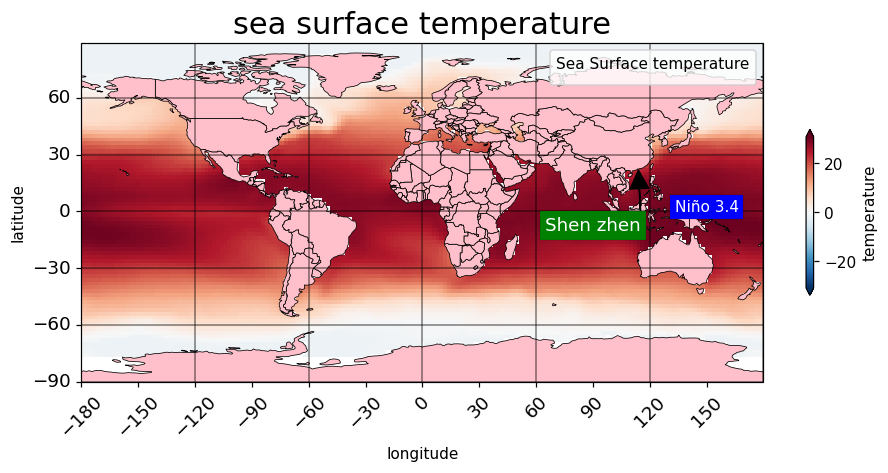

In [7]:
ds=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine="netcdf4")
sst=ds.sst.isel(time=-1)

plt.figure(figsize=(10,5),dpi=110)

#choose a projection style
proj=ccrs.PlateCarree()
ax=plt.axes(projection=proj)

# legend
plt.legend(title='Sea Surface temperature',loc='best')    

# feature
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='pink',
                                           edgecolor='black',
                                           linewidth=0.5))
sst.plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4,'label':'temperature','extend':'both'})

# gridline
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,color='black',alpha=0.5)

# annotate
plt.annotate('Shen zhen', xy=(114,22), xytext=(90, -10),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# text
plt.text(150,0,"Niño 3.4", transform=plt.gca().transData, horizontalalignment='center', color='white',
         bbox=dict(boxstyle='square', fc='blue', linewidth=0.1))
plt.title('sea surface temperature',fontsize = 20)

# x label and y label
plt.xlabel('longitude')
plt.ylabel('latitude')

# Adjust xy axis ticks
plt.xticks(ticks=np.arange(-180,180,30), fontsize=12, rotation=45, ha='center', va='top')
plt.yticks(ticks=np.arange(-90,90,30), fontsize=12, rotation=0, ha='right', va='center')

plt.show()

# PS2.2
Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).


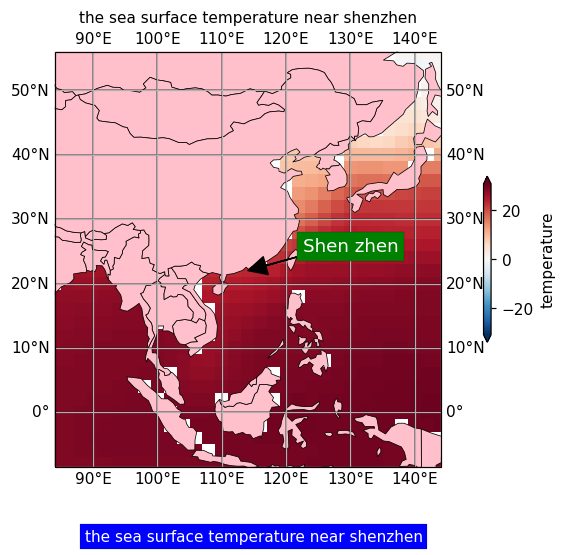

In [57]:
plt.figure(figsize=(10,5),dpi=110)

#choose a projection style
central_lon, central_lat = 114.06, 22.54 # Shenzhen
proj=ccrs.PlateCarree()
ax=plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-30, central_lon+30, central_lat-30, central_lat+30]
ax.set_extent(extent)
   
# feature
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='pink',
                                           edgecolor='black',
                                           linewidth=0.5))

#colorbar
sst.plot(ax=ax,transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.4,'label':'temperature','extend':'both'})

# gridline
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,color='black',alpha=0.5)

# x label and y label and ticks
ax.gridlines(draw_labels=True)
plt.tick_params(axis='both',labelsize=30)

# annotate
plt.annotate('Shen zhen', xy=(114,22), xytext=(130,25),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# text
plt.text(115,-20,"the sea surface temperature near shenzhen", transform=plt.gca().transData, horizontalalignment='center', color='white',
         bbox=dict(boxstyle='square', fc='blue', linewidth=0.1))

# legend
plt.legend(title='Sea Surface temperature',loc='best') 

# title
plt.title('the sea surface temperature near shenzhen',fontsize = 10)

plt.show()